In [6]:
# Cell 1: Imports
import sys
import os
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

sys.path.append(os.path.abspath(".."))

from ml_helpers import (
    clean_data, encode_categorical, scale_features, split_features_target,
    plot_histogram, plot_correlation_matrix, plot_feature_importance,
    plot_boxplot, plot_pairplot, plot_distribution, plot_scatter_matrix,
    plot_feature_distribution, plot_categorical_distribution, plot_numeric_distribution,
    plot_confusion, plot_roc, plot_precision_recall,
    interactive_plot, interactive_scatter
)

In [7]:
# Cell 2: Load dataset
iris_data = load_iris(as_frame=True)
df = iris_data.frame.copy()

# Introduce a NaN value to test cleaning
df.loc[0, 'sepal length (cm)'] = None
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,NaN,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Cell 3: Preprocessing
df_clean = clean_data(df)
print("Missing values after cleaning:")
print(df_clean.isna().sum())

# Encode categorical columns if any
df_encoded = encode_categorical(df_clean)
# Scale numeric columns
df_scaled = scale_features(df_encoded)

Missing values after cleaning:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


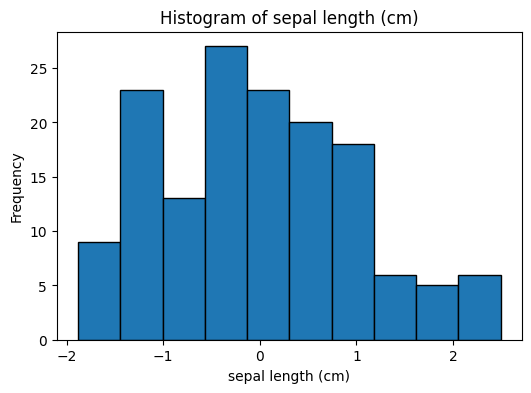

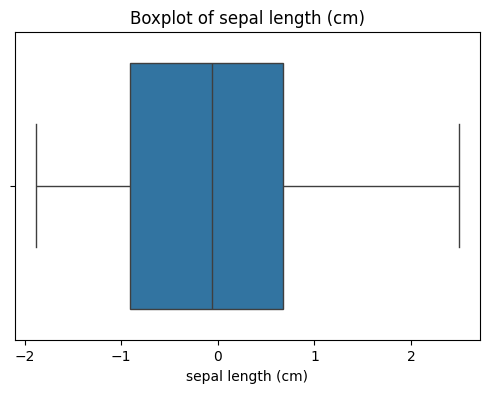

c:\Users\DELL\Desktop\GSOC Projects\smart-ml-helpers\ml_helpers\feature_viz.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(series, shade=True)


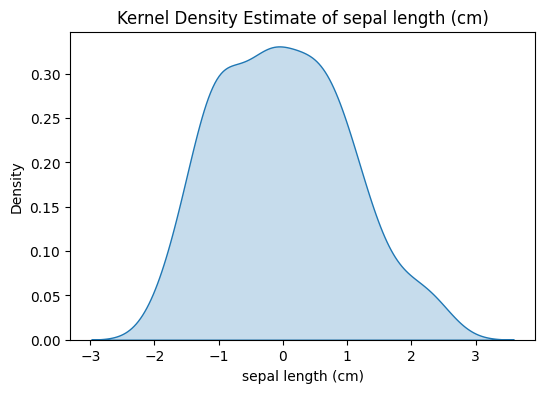

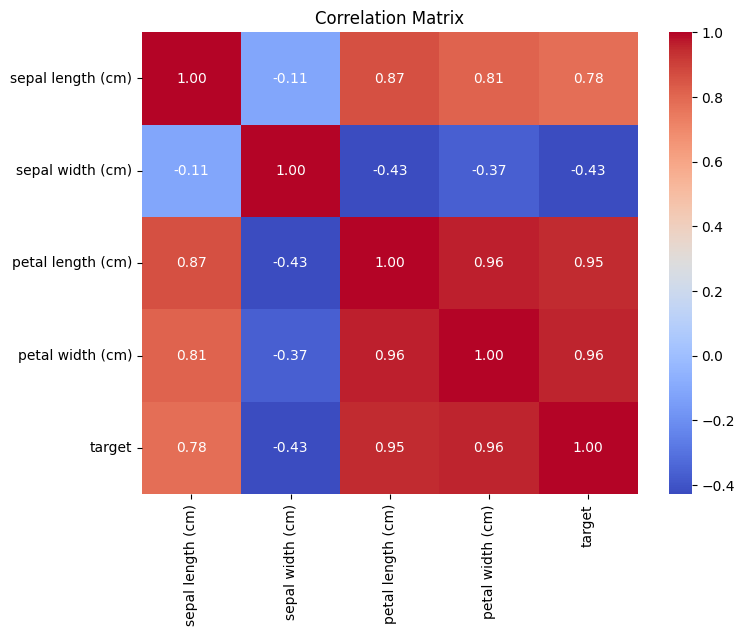

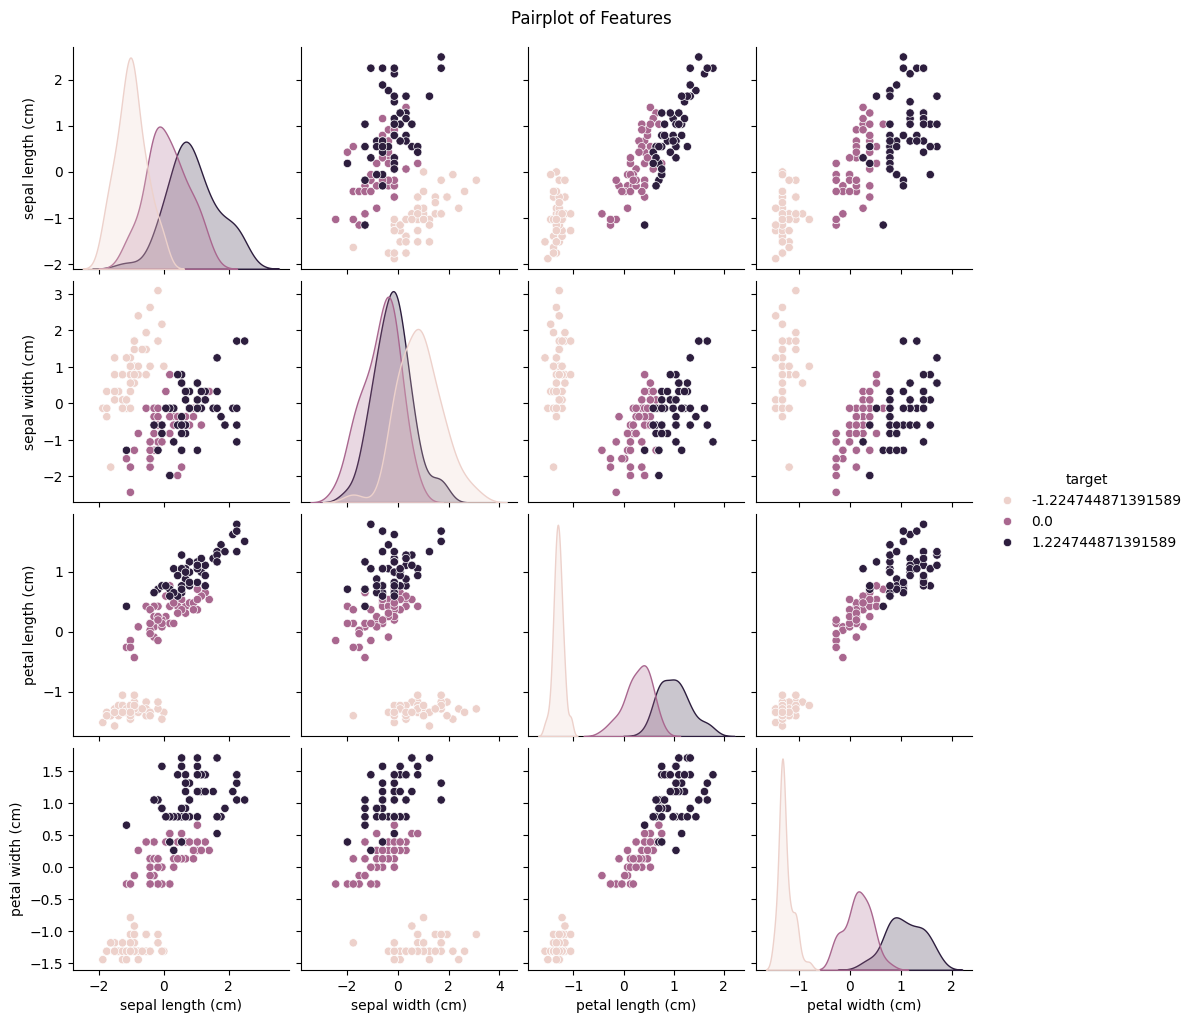

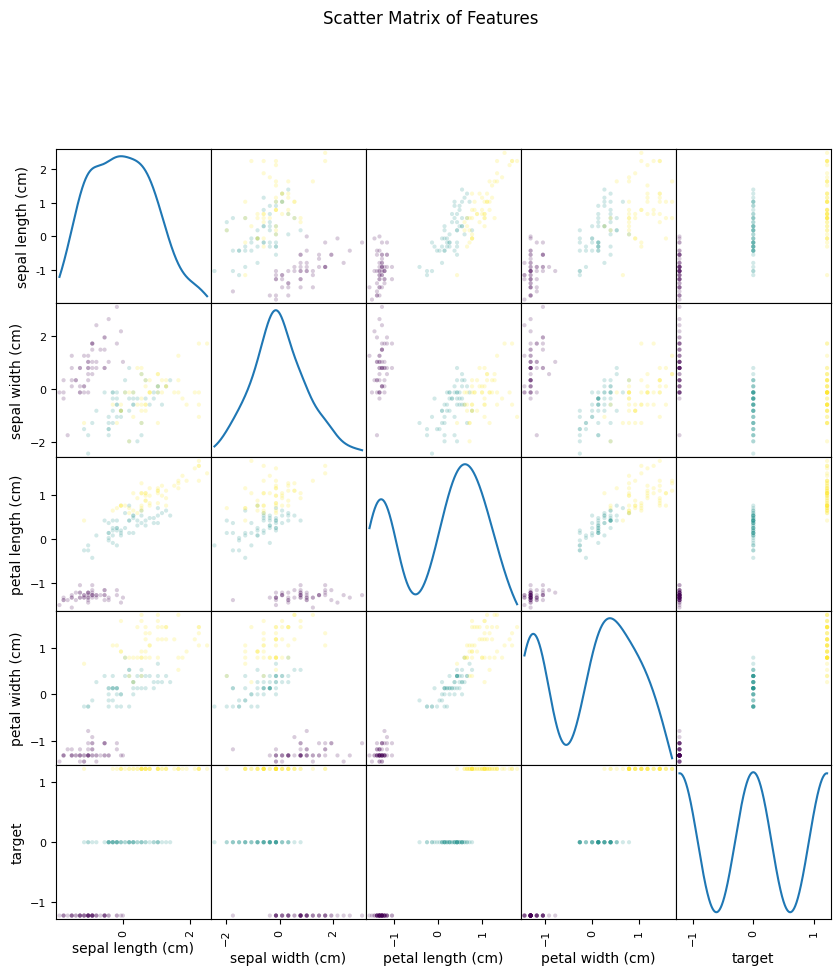

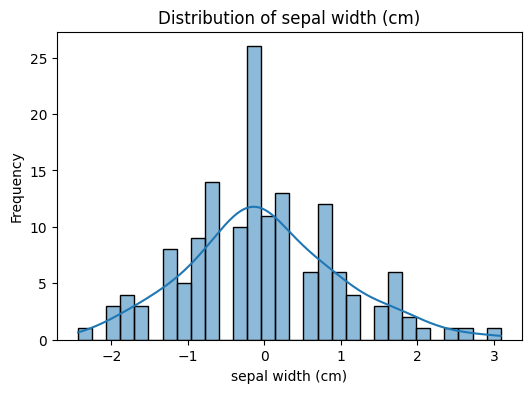

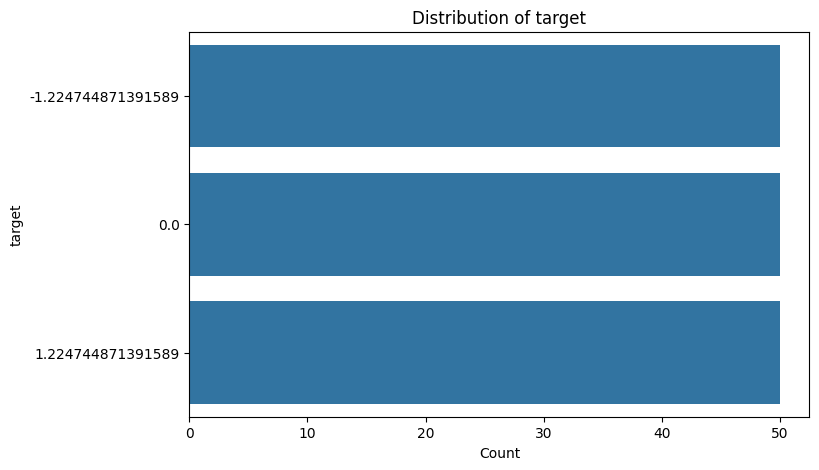

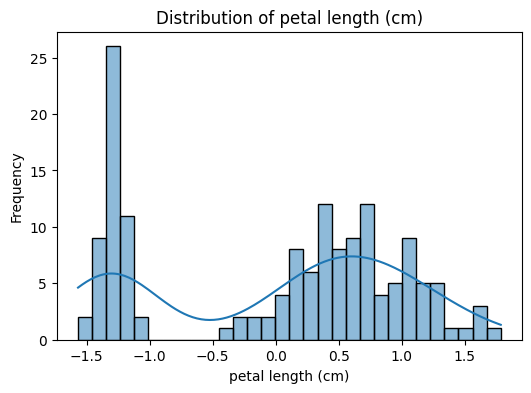

In [9]:
# Cell 4: Feature Visualizations
plot_histogram(df_scaled['sepal length (cm)'])
plot_boxplot(df_scaled, 'sepal length (cm)')
plot_distribution(df_scaled['sepal length (cm)'], kind='kde')
plot_correlation_matrix(df_scaled)
plot_pairplot(df_scaled, hue='target')
plot_scatter_matrix(df_scaled, hue=df_scaled['target'])
plot_feature_distribution(df_scaled, 'sepal width (cm)')
plot_categorical_distribution(df_scaled, 'target')
plot_numeric_distribution(df_scaled, 'petal length (cm)')

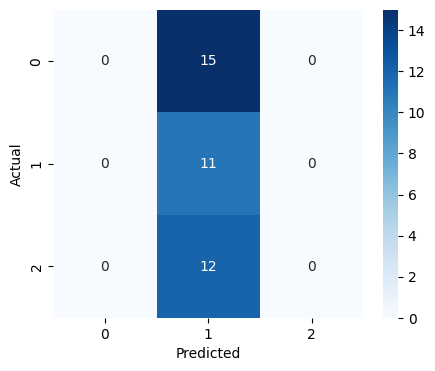

Accuracy: 0.29


In [10]:
# Cell 5: Model Visualization



# Separate features and target
X = df_encoded.drop(columns=['target'])  # features only
y = df_encoded['target']                  # target column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and train a dummy classifier
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot confusion matrix
plot_confusion(y_test, y_pred)

# Optional: Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

In [ ]:
# Cell 6: Interactive Visualizations
interactive_plot(df_scaled)
interactive_scatter(df_scaled)

interactive(children=(Dropdown(description='col', options=('sepal length (cm)', 'sepal width (cm)', 'petal len…

interactive(children=(Dropdown(description='x_col', options=('sepal length (cm)', 'sepal width (cm)', 'petal l…